<a href="https://colab.research.google.com/github/anioki/ML_training_projects/blob/main/fish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Download data

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"annaonishchenko","key":"8402689925943b82e029c24ccf02e1bd"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

ref                                                           title                                              size  lastUpdated          downloadCount  
------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                   Reddit Vaccine Myths                              229KB  2021-06-18 20:55:49           7847  
crowww/a-large-scale-fish-dataset                             A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           4777  
imsparsh/musicnet-dataset                                     MusicNet Dataset                                   22GB  2021-02-18 14:12:19           1604  
dhruvildave/wikibooks-dataset                                 Wikibooks Dataset                                   1GB  2021-06-09 15:58:24           2260  
mathurinache/twitter-edge-nodes                               Tw

In [4]:
! kaggle datasets download -d crowww/a-large-scale-fish-dataset

100% 3.24G/3.24G [01:18<00:00, 60.4MB/s]
100% 3.24G/3.24G [01:18<00:00, 44.2MB/s]


In [5]:
! mkdir data
! unzip a-large-scale-fish-dataset.zip -d data

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: data/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00435.png  
  inflating: data/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00436.png  
  inflating: data/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00437.png  
  inflating: data/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00438.png  
  inflating: data/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00439.png  
  inflating: data/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00440.png  
  inflating: data/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00441.png  
  inflating: data/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00442.png  
  inflating: data/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00443.png  
  inflating: data/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00444.png  
  inflating: data/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00445.png  
  inflating: data/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00446.png  
  inflating: data/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00447.png  
  inflating: data/Fish

In [6]:
import pandas as pd
import os

In [7]:
dir = '/content/data/Fish_Dataset/Fish_Dataset'
label = []
path = []
for dirname, _,filenames in os.walk(dir):
    for filename in filenames:
        if os.path.splitext(filename)[1]=='.png':
            if dirname.split()[-1]!='GT':          
                label.append(os.path.split(dirname)[1])
                path.append(os.path.join(dirname,filename))

df = pd.DataFrame(columns=['path','label'])
df['path']=path
df['label']=label

In [8]:
df

,path,label
0,/content/data/Fish_Dataset/Fish_Dataset/Sea Ba...,Sea Bass
1,/content/data/Fish_Dataset/Fish_Dataset/Sea Ba...,Sea Bass
2,/content/data/Fish_Dataset/Fish_Dataset/Sea Ba...,Sea Bass
3,/content/data/Fish_Dataset/Fish_Dataset/Sea Ba...,Sea Bass
4,/content/data/Fish_Dataset/Fish_Dataset/Sea Ba...,Sea Bass
...,...,...
8995,/content/data/Fish_Dataset/Fish_Dataset/Hourse...,Hourse Mackerel
8996,/content/data/Fish_Dataset/Fish_Dataset/Hourse...,Hourse Mackerel
8997,/content/data/Fish_Dataset/Fish_Dataset/Hourse...,Hourse Mackerel
8998,/content/data/Fish_Dataset/Fish_Dataset/Hourse...,Hourse Mackerel


#Data Preprocessing

In [9]:
df['label']=df['label'].astype('category')

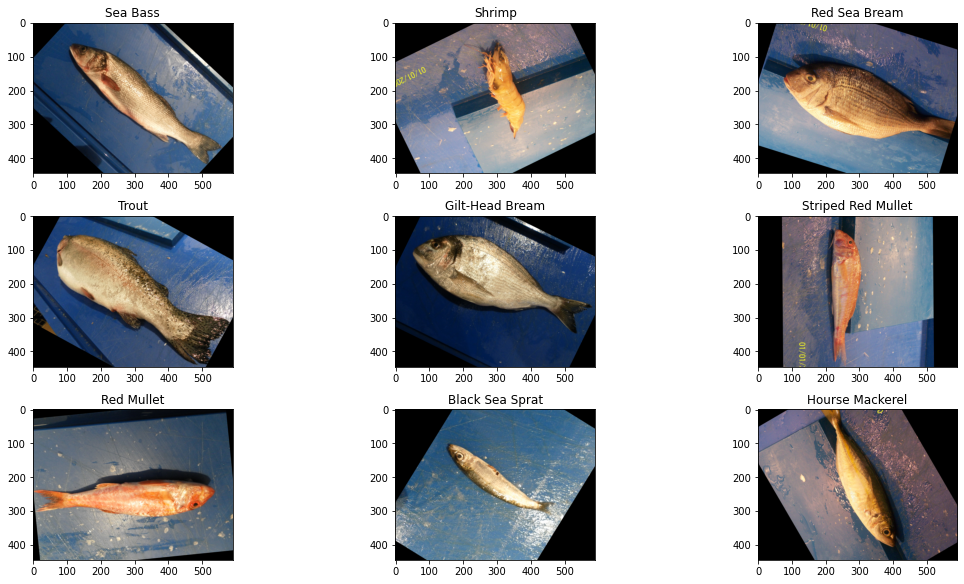

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,8), constrained_layout=True)
ax=ax.flatten()
j=0
for i in df['label'].unique():
    
    ax[j].imshow(plt.imread(df[df['label']==i].iloc[0,0]))
    ax[j].set_title(i)
    j=j+1

In [11]:
class_names = df['label'].unique()
plt.imread(df['path'][1]).shape

(445, 590, 3)

In [12]:
from sklearn.model_selection import train_test_split
Train_set, test_set = train_test_split(df, test_size = 0.3, random_state = 42)
train_set, val_set = train_test_split(Train_set, test_size= 0.2, random_state = 42)

In [13]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import preprocess_input
img_gen = ImageDataGenerator(preprocessing_function = preprocess_input, rescale=1/255)
img_size=(224, 224)
# img_gen cannot take in an array, so ensure the data that is been passed is a dataframe
train = img_gen.flow_from_dataframe(dataframe = train_set,
    x_col = 'path', 
    y_col ='label', 
    target_size = (224, 224),
    color_mode = 'rgb',
    class_mode = 'categorical',#the class mode here and that for the model_loss(when using sequential model)
                                    #should be the same
    batch_size = 32,
    shuffle = False 
)

test = img_gen.flow_from_dataframe(dataframe = test_set,
    x_col = 'path', 
    y_col ='label', 
    target_size =(224, 224),
    color_mode ='rgb',
    class_mode ='categorical',
    batch_size = 32,
    shuffle = False 
)


val = img_gen.flow_from_dataframe(dataframe = val_set,
    x_col = 'path', 
    y_col ='label', 
    target_size =(224, 224),
    color_mode ='rgb',
    class_mode ='categorical',
    batch_size = 32,
    shuffle = False 
)

Found 5040 validated image filenames belonging to 9 classes.
Found 2700 validated image filenames belonging to 9 classes.
Found 1260 validated image filenames belonging to 9 classes.


In [14]:
image_shape=test[0][0].shape[1:]
image_shape

(224, 224, 3)

In [15]:
test.class_indices

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

#Model

In [16]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [17]:
model = models.Sequential()
model.add(layers.Conv2D(filters = 32, kernel_size=(3, 3), strides=(1, 1), 
                                activation='relu', padding='valid', input_shape = image_shape))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(rate = 0.3))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(9, activation='softmax')) 

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 394272)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               50466944  
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 5

In [18]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

results = model.fit(train, epochs=6, validation_data=val, verbose = 1)

Epoch 1/6
158/158 [==============================] - 248s 2s/step - loss: 1.9724 - accuracy: 0.4704 - val_loss: 0.6473 - val_accuracy: 0.8198
Epoch 2/6
158/158 [==============================] - 246s 2s/step - loss: 0.5228 - accuracy: 0.8288 - val_loss: 0.1846 - val_accuracy: 0.9532
Epoch 3/6
158/158 [==============================] - 241s 2s/step - loss: 0.2459 - accuracy: 0.9194 - val_loss: 0.1386 - val_accuracy: 0.9611
Epoch 4/6
158/158 [==============================] - 245s 2s/step - loss: 0.1433 - accuracy: 0.9544 - val_loss: 0.0748 - val_accuracy: 0.9738
Epoch 5/6
158/158 [==============================] - 242s 2s/step - loss: 0.1006 - accuracy: 0.9677 - val_loss: 0.0892 - val_accuracy: 0.9762
Epoch 6/6
158/158 [==============================] - 262s 2s/step - loss: 0.0864 - accuracy: 0.9692 - val_loss: 0.0659 - val_accuracy: 0.9794


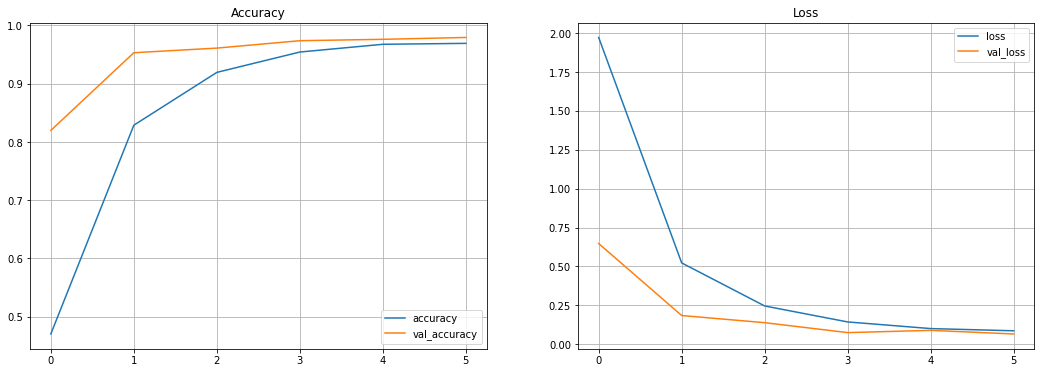

In [19]:
result=pd.DataFrame(results.history)
fig, ax=plt.subplots(nrows=1, ncols=2,figsize=(18,6))
ax=ax.flatten()
ax[0].plot(result['accuracy'], label='accuracy')
ax[0].plot(result['val_accuracy'], label='val_accuracy')
ax[0].set_title("Accuracy")
ax[0].legend(loc='lower right')
ax[0].grid()

ax[1].plot(result['loss'], label='loss')
ax[1].plot(result['val_loss'], label='val_loss')
ax[1].set_title("Loss")
ax[1].legend(loc='upper right')
ax[1].grid()

#Predict

In [20]:
import numpy as np

# Predict the label of the test_images
pred = model.predict(test)


In [21]:
pred = np.argmax(pred,axis = 1)
labels = (train.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred2 = [labels[k] for k in pred]
from sklearn.metrics import classification_report, confusion_matrix # import metrics for evaluation

y_test = test_set.label # set y_test to the expected output

print(classification_report(y_test, pred2)) # print the classification report

                    precision    recall  f1-score   support

   Black Sea Sprat       1.00      0.97      0.98       297
   Gilt-Head Bream       0.94      1.00      0.97       296
   Hourse Mackerel       1.00      0.99      0.99       294
        Red Mullet       0.99      1.00      1.00       314
     Red Sea Bream       1.00      0.99      0.99       287
          Sea Bass       0.93      0.99      0.96       300
            Shrimp       0.99      0.99      0.99       326
Striped Red Mullet       0.98      0.97      0.98       298
             Trout       1.00      0.93      0.96       288

          accuracy                           0.98      2700
         macro avg       0.98      0.98      0.98      2700
      weighted avg       0.98      0.98      0.98      2700

